<a href="https://colab.research.google.com/github/CuongLeManh02/Learning-content/blob/main/identify_3_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Database/Flowers/

/content/drive/MyDrive/Colab Notebooks/Database/Flowers


In [3]:
train_img=('/content/drive/MyDrive/Colab Notebooks/Database/Flowers/Train')

In [4]:
valid_img=('/content/drive/MyDrive/Colab Notebooks/Database/Flowers/Valid')

In [5]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
valid_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [15]:
train_f= train_dg.flow_from_directory(train_img,target_size=(200,200),class_mode='categorical')
valid_f= valid_dg.flow_from_directory(valid_img,target_size=(200,200),class_mode='categorical')

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [8]:
x_train,y_train=next(train_f)

In [16]:
x_train.shape

(32, 200, 200, 3)

In [17]:
y_train.shape

(32, 3)

In [11]:
label=['Dandelion','Rose','Sunflower']

In [18]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 128)     

In [20]:
model.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_f,epochs=200,batch_size=128,verbose=1, validation_data=valid_f, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/200
15/15 [==============================] - 7s 434ms/step - loss: 0.8931 - accuracy: 0.6000 - val_loss: 0.4365 - val_accuracy: 0.9000
Epoch 2/200
15/15 [==============================] - 6s 426ms/step - loss: 0.2998 - accuracy: 0.9000 - val_loss: 0.2442 - val_accuracy: 0.9250
Epoch 3/200
15/15 [==============================] - 6s 422ms/step - loss: 0.2227 - accuracy: 0.9167 - val_loss: 0.2397 - val_accuracy: 0.9083
Epoch 4/200
15/15 [==============================] - 6s 420ms/step - loss: 0.1708 - accuracy: 0.9333 - val_loss: 0.2440 - val_accuracy: 0.9583
Epoch 5/200
15/15 [==============================] - 6s 419ms/step - loss: 0.1377 - accuracy: 0.9417 - val_loss: 0.2057 - val_accuracy: 0.9417
Epoch 6/200
15/15 [==============================] - 6s 428ms/step - loss: 0.1233 - accuracy: 0.9500 - val_loss: 0.3356 - val_accuracy: 0.9333
Epoch 7/200
15/15 [==============================] - 6s 427ms/step - loss: 0.2023 - accuracy: 0.9375 - val_loss: 0.4025 - val_accuracy: 0.9083

In [21]:
model.save('identify 3 flowers.h5')

In [23]:
metric = model.evaluate(x_train,y_train,verbose=2)
print('Loss:',metric[0])
print('Accuracy:',metric[1])

1/1 - 0s - loss: 2.1683e-04 - accuracy: 1.0000 - 41ms/epoch - 41ms/step
Loss: 0.00021683450904674828
Accuracy: 1.0


1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 1.0000000e+00 2.0403399e-36]]
1/1 [==============================] - 0s 14ms/step
This is: Rose


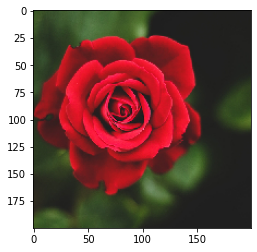

In [28]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Flowers/test/1.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 77ms/step
[[9.9999726e-01 2.7840790e-06 2.5375401e-08]]
1/1 [==============================] - 0s 101ms/step
This is: Dandelion


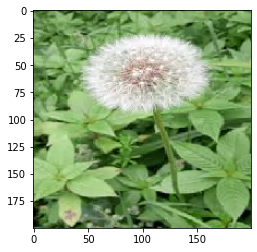

In [29]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Flowers/test/2.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 82ms/step
[[1.3977030e-05 2.5255233e-04 9.9973351e-01]]
1/1 [==============================] - 0s 41ms/step
This is: Sunflower


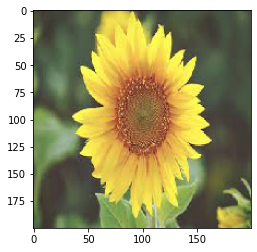

In [30]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Flowers/test/3.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])